In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

2023-10-22 15:51:34.959543: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /home/omkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import re
df = pd.read_csv('../../IR/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)

df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']

df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


In [4]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)
df.text = df.text.apply(lambda x: preprocess(x))

In [6]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.text)

word_index = tokenizer.word_index

In [9]:
tokenizer.texts_to_sequences(df.text)
word_index

{'good': 1,
 'day': 2,
 'get': 3,
 'like': 4,
 'go': 5,
 'quot': 6,
 'today': 7,
 'work': 8,
 'love': 9,
 'going': 10,
 'got': 11,
 'lol': 12,
 'time': 13,
 'back': 14,
 'u': 15,
 'one': 16,
 'know': 17,
 'im': 18,
 'really': 19,
 'amp': 20,
 'see': 21,
 'night': 22,
 'still': 23,
 '2': 24,
 'well': 25,
 'new': 26,
 'want': 27,
 'think': 28,
 'home': 29,
 'thanks': 30,
 'oh': 31,
 'much': 32,
 'miss': 33,
 'need': 34,
 'last': 35,
 'morning': 36,
 'tomorrow': 37,
 'hope': 38,
 'great': 39,
 'twitter': 40,
 '3': 41,
 'haha': 42,
 'feel': 43,
 'sad': 44,
 'fun': 45,
 'wish': 46,
 'sleep': 47,
 'right': 48,
 'bad': 49,
 'would': 50,
 'happy': 51,
 'sorry': 52,
 'tonight': 53,
 'come': 54,
 'make': 55,
 'way': 56,
 'getting': 57,
 'though': 58,
 'gonna': 59,
 'nice': 60,
 'better': 61,
 'watching': 62,
 'yeah': 63,
 'wait': 64,
 'bed': 65,
 'could': 66,
 'week': 67,
 'school': 68,
 'people': 69,
 'hate': 70,
 'days': 71,
 'even': 72,
 'hey': 73,
 '4': 74,
 'yes': 75,
 'next': 76,
 'lt': 77

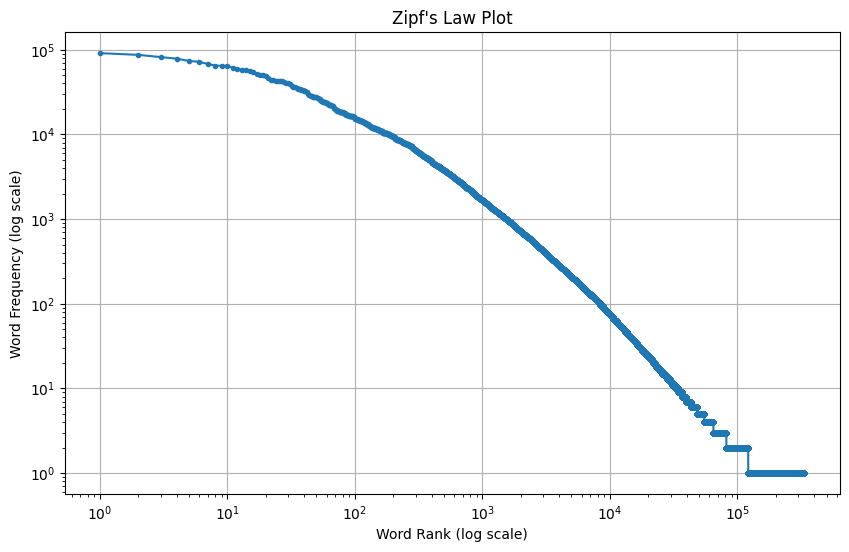

In [11]:
from collections import Counter 
corpus = " ".join(df.text)

# Tokenize the text into words
words = corpus.split()

# Count the frequency of each word using Counter
word_freq = Counter(words)

# Sort the words by frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Get the word frequencies and calculate the ranks
word_frequencies = [count for word, count in sorted_word_freq]
word_ranks = list(range(1, len(word_frequencies) + 1))

# Create a Zipf's Law plot in log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(word_ranks, word_frequencies, marker='.')
plt.title("Zipf's Law Plot")
plt.xlabel("Word Rank (log scale)")
plt.ylabel("Word Frequency (log scale)")
plt.grid(True)
plt.show()

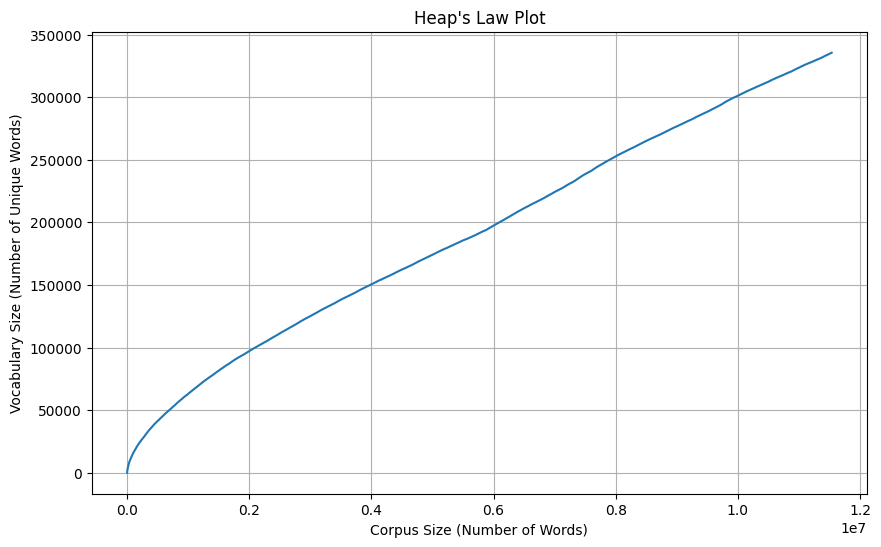

In [13]:
import matplotlib.pyplot as plt

# Assuming `df.text` is a list of text documents
# You can concatenate the text documents into a single string
corpus = " ".join(df.text)

# Tokenize the text into words
words = corpus.split()

# Initialize lists to store the vocabulary size and corpus size
vocabulary_size = []
corpus_size = []

# Initialize a set to keep track of unique words
unique_words = set()

# Process the text and calculate vocabulary and corpus size
for i, word in enumerate(words):
    unique_words.add(word)
    vocabulary_size.append(len(unique_words))
    corpus_size.append(i + 1)  # i is zero-indexed, so we add 1

# Create a Heap's Law plot
plt.figure(figsize=(10, 6))
plt.plot(corpus_size, vocabulary_size)
plt.title("Heap's Law Plot")
plt.xlabel("Corpus Size (Number of Words)")
plt.ylabel("Vocabulary Size (Number of Unique Words)")
plt.grid(True)
plt.show()

In [ ]:
corpus[0:10]

'a'